# ### Advanced Machine Learning

# Unsupervised Learning - Clustering and Mixture Models


# HW #3: Unsupervised ML 


In [1]:
student1Name="Alexander Kruglyak"
student1ID="323637736"


student2Name="Sofya Zubtsovsky"
student2ID="337839112"

## MNIST dataset

We saw this dataset in a previous class exercise. The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import pandas as pd

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [3]:
#our imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import DistanceMetric
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


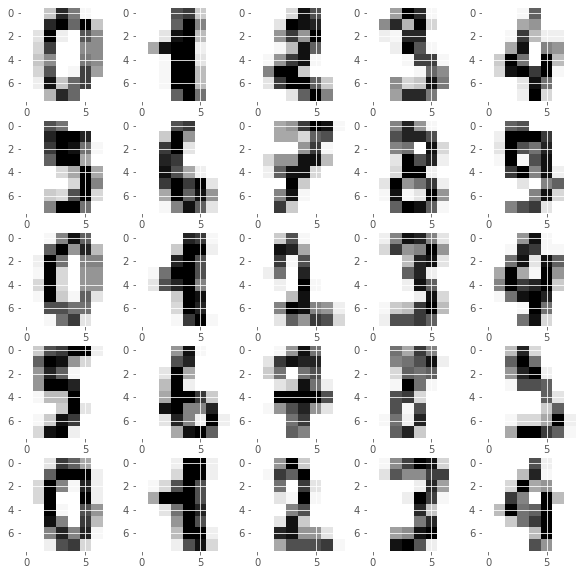

In [4]:
digits = load_digits()
X = digits.data
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

## MNIST: visualization
**1:** Use PCA and T-SNE methods to project a 2D visualization of the dataset 

(1797, 2)


Text(0, 0.5, 'second principal component')

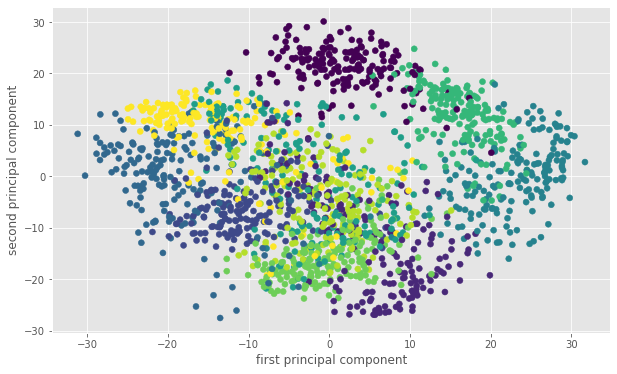

In [5]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
print(X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

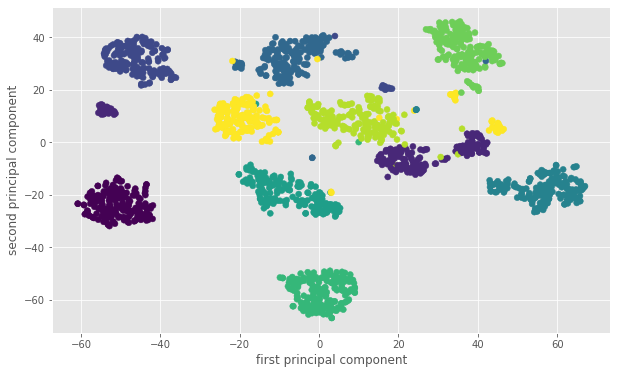

In [6]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

## MNIST:  clustering
**1:** Use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

(10, 64)
(1797,)
KMeans Homogeneity score: 0.733664


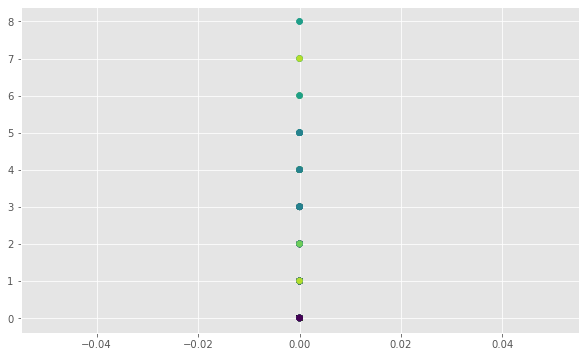

In [7]:
X = digits.data
y = digits.target
km = KMeans(n_clusters=n_digits, random_state=0, n_init=1,init="random",n_jobs=-1)

km.fit_predict(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
h_score = homogeneity_score(y,km.labels_)
print("%s Homogeneity score: %f"%(km.__class__.__name__,h_score))


**2:** Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. Did it change?


(10, 64)
(1797,)
AgglomerativeClustering Homogeneity score: 0.857513


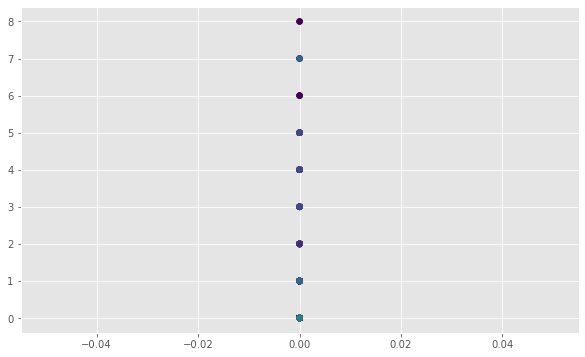

In [8]:
hierar = AgglomerativeClustering(n_clusters=n_digits)
hierar.fit_predict(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
plt.scatter(X[:, 0], X[:, 1], c=hierar.labels_)
h_score = homogeneity_score(y,hierar.labels_)
print("%s Homogeneity score: %f"%(hierar.__class__.__name__,h_score))

**3.** Use DBScan to cluster the dataset. A problem you will face is choosing $\epsilon$. You can use the DistanceMetric function to get a sense of typical distances between points.  Again compute the homogeneity.

Text(0.5, 1.0, 'Distribution of distances between points')

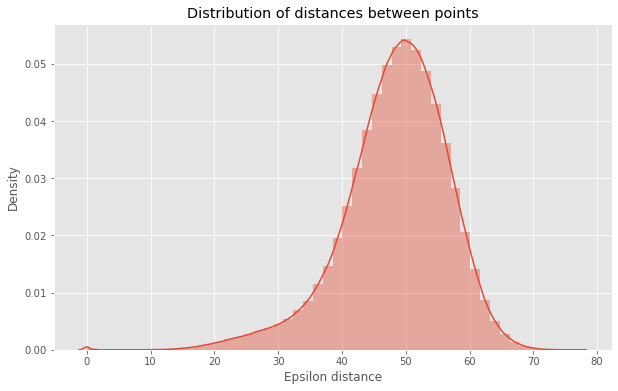

In [9]:
dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
sns.distplot(distances, hist=True, kde=True)
plt.xlabel('Epsilon distance')
plt.title("Distribution of distances between points")

### Conclusion from distance metric
We can see that typical distances between points are 40-60. So we can use as epsilon value less than typical, let's say 20 - meaning for ckustering will be taken neigbors that are at most 20 units far from the centroid.

In [10]:
eps = np.arange(5,30,5)
min_samples = np.arange(1,10,1)
for e in eps:
    for m in min_samples: 
        dbscan = DBSCAN(eps=e, min_samples=m)
        dbscan.fit_predict(X)
        h_score = homogeneity_score(y,dbscan.labels_)
        print("%s Homogeneity score eps %d min_samples %d: %f"%(dbscan.__class__.__name__,e,m,h_score))

DBSCAN Homogeneity score eps 5 min_samples 1: 1.000000
DBSCAN Homogeneity score eps 5 min_samples 2: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 3: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 4: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 5: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 6: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 7: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 8: 0.000000
DBSCAN Homogeneity score eps 5 min_samples 9: 0.000000
DBSCAN Homogeneity score eps 10 min_samples 1: 1.000000
DBSCAN Homogeneity score eps 10 min_samples 2: 0.019101
DBSCAN Homogeneity score eps 10 min_samples 3: 0.005595
DBSCAN Homogeneity score eps 10 min_samples 4: 0.002223
DBSCAN Homogeneity score eps 10 min_samples 5: 0.000000
DBSCAN Homogeneity score eps 10 min_samples 6: 0.000000
DBSCAN Homogeneity score eps 10 min_samples 7: 0.000000
DBSCAN Homogeneity score eps 10 min_samples 8: 0.000000
DBSCAN Homogeneity score eps 10 min_samples 9: 0.000000
D

In [11]:
dbscan = DBSCAN(eps=20, min_samples=1,n_jobs=-1)
dbscan.fit_predict(X)
h_score = homogeneity_score(y,dbscan.labels_)
print("%s Homogeneity score : %f"%(dbscan.__class__.__name__,h_score))

DBSCAN Homogeneity score : 0.897479


**4.** Use Gausian Mixture Models to cluster the dataset.  Again compute the homogeneity.

In [12]:
gmm = GaussianMixture(n_components=n_digits)
y_pred = gmm.fit_predict(X)
h_score = homogeneity_score(y,y_pred)
print("%s Homogeneity score: %f"%(gmm.__class__.__name__,h_score))

GaussianMixture Homogeneity score: 0.650356


**5.** Take a look at the clustering methods and options for various methods on the [scikit-learn page](http://scikit-learn.org/stable/modules/clustering.html). By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [13]:
def compare_method(estimator, name, data):
    t0 = time()
    y_pred = estimator.fit_predict(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, y_pred)))

In [14]:
methods = {
    'KMeans' : KMeans(init='random', n_clusters=n_digits, n_init=10),
    'AffinityPropagation': AffinityPropagation(),
    'MeanShift': MeanShift(n_jobs=-1),
    'Ward':AgglomerativeClustering(n_clusters=n_digits,linkage='ward'),
    'Complete':AgglomerativeClustering(n_clusters=n_digits,linkage='complete'),
    'Average':AgglomerativeClustering(n_clusters=n_digits,linkage='average'),
    'Single':AgglomerativeClustering(n_clusters=n_digits,linkage='single'),
    'DBSCAN':DBSCAN(eps=20, min_samples=1,n_jobs=-1),
    'OPTICS':OPTICS(n_jobs=-1),
    'Birch':Birch(n_clusters=n_digits),
    'GaussianMixture':GaussianMixture(n_components=n_digits), 
    'SpectralClustering':SpectralClustering(n_clusters=n_digits,n_jobs=-1)
}

In [ ]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
for name, method in methods.items():
    compare_method(estimator=method, name=name, data=X)

__________________________________________________
   method                   time      homo
                   KMeans   0.09s     0.742 
      AffinityPropagation   4.33s     0.959 
                MeanShift   5.82s     0.000 
                     Ward   0.19s     0.858 
                 Complete   0.19s     0.591 
                  Average   0.17s     0.655 
                   Single   0.11s     0.005 
                   DBSCAN   0.24s     0.897 
                   OPTICS   11.35s     0.284 
                    Birch   0.30s     0.858 
          GaussianMixture   0.58s     0.766 
